In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from torchvision.datasets import MNIST
from monai.data import CacheDataset, DataLoader
from monai.transforms import Compose, ScaleIntensityd, EnsureChannelFirstd, ToTensord

In [5]:
# 載入資料（不轉換，保持原始格式）
train_dataset = MNIST(root="./data", train=True, download=True)
test_dataset = MNIST(root="./data", train=False, download=True)

print(f"訓練資料數量: {len(train_dataset)}")
print(f"測試資料數量: {len(test_dataset)}")

#印出前3筆
for i in range(3):
    img, label = train_dataset[i]
    print(f"第 {i} 筆 - label: {label}, 類型: {type(img)}")
         
    # 轉為numpy看數值
    img_array = np.array(img)
    print(f"  數值範圍: [{img_array.min()} ~ {img_array.max()}], 形狀: {img_array.shape}")
    print(f"  前5x5像素:\n{img_array[:5, :5]}")

訓練資料數量: 60000
測試資料數量: 10000
第 0 筆 - label: 5, 類型: <class 'PIL.Image.Image'>
  數值範圍: [0 ~ 255], 形狀: (28, 28)
  前5x5像素:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
第 1 筆 - label: 0, 類型: <class 'PIL.Image.Image'>
  數值範圍: [0 ~ 255], 形狀: (28, 28)
  前5x5像素:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
第 2 筆 - label: 4, 類型: <class 'PIL.Image.Image'>
  數值範圍: [0 ~ 255], 形狀: (28, 28)
  前5x5像素:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


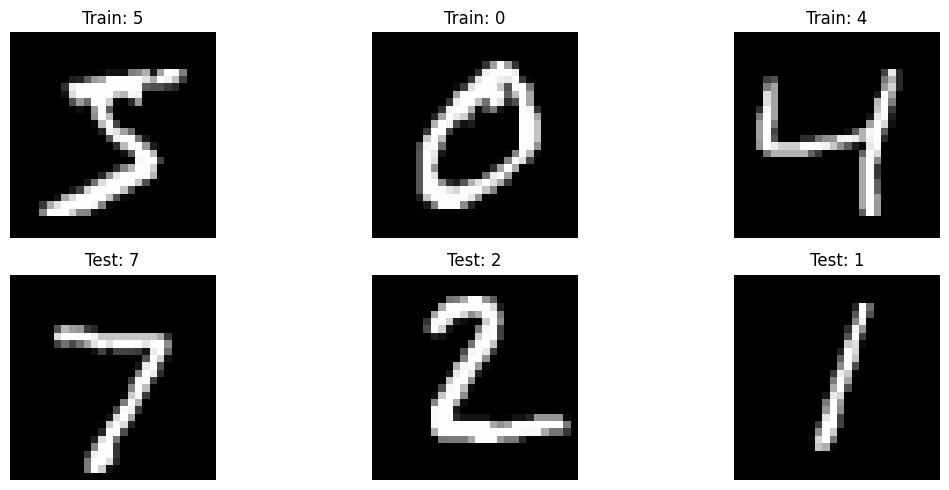

In [7]:
# 顯示圖片
fig, axes = plt.subplots(2, 3, figsize=(12, 5))

for i in range(3):
    img, label = train_dataset[i]
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].set_title(f'Train: {label}')
    axes[0, i].axis('off')

    img, label = test_dataset[i]
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].set_title(f'Test: {label}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [8]:
def analyze_ds(dataset, name):
    print(f"\n=== {name} statistic analyze ===")

    labels = []
    pixel_values = []

    for i in range(len(dataset)):
        img, label = dataset[i]
        img_array = np.array(img)
        labels.append(label)
        pixel_values.extend(img_array.flatten())

    labels = np.array(labels)
    pixel_values = np.array(pixel_values)

    print(f"Label distribution")
    unique, counts = np.unique(labels, return_counts=True)
    for u, c in zip(unique, counts):
        print(f"Number {u}: {c} sheet ({c/len(dataset)*100:.1f}%)")

    print(f"Pixel statistic")
    print(f" Min: {pixel_values.min()}")
    print(f" Max: {pixel_values.max()}")
    print(f" Avg: {pixel_values.mean()}")
    print(f" Std: {pixel_values.std()}")

analyze_ds(train_dataset, "Train")
analyze_ds(test_dataset, "Test")


=== Train statistic analyze ===
Label distribution
Number 0: 5923 sheet (9.9%)
Number 1: 6742 sheet (11.2%)
Number 2: 5958 sheet (9.9%)
Number 3: 6131 sheet (10.2%)
Number 4: 5842 sheet (9.7%)
Number 5: 5421 sheet (9.0%)
Number 6: 5918 sheet (9.9%)
Number 7: 6265 sheet (10.4%)
Number 8: 5851 sheet (9.8%)
Number 9: 5949 sheet (9.9%)
Pixel statistic
 Min: 0
 Max: 255
 Avg: 33.318421449829934
 Std: 78.56748998339798

=== Test statistic analyze ===
Label distribution
Number 0: 980 sheet (9.8%)
Number 1: 1135 sheet (11.3%)
Number 2: 1032 sheet (10.3%)
Number 3: 1010 sheet (10.1%)
Number 4: 982 sheet (9.8%)
Number 5: 892 sheet (8.9%)
Number 6: 958 sheet (9.6%)
Number 7: 1028 sheet (10.3%)
Number 8: 974 sheet (9.7%)
Number 9: 1009 sheet (10.1%)
Pixel statistic
 Min: 0
 Max: 255
 Avg: 33.791224489795916
 Std: 79.17246322228644


In [ ]:
# import os

# def find_mnist_files():
#     print("\n=== 尋找MNIST原始檔案 ===")
#     mnist_path = "./data/MNIST/raw"
    
#     if os.path.exists(mnist_path):
#         print(f"找到MNIST原始檔案夾: {os.path.abspath(mnist_path)}")
#         files = os.listdir(mnist_path)
#         for file in files:
#             file_path = os.path.join(mnist_path, file)
#             size = os.path.getsize(file_path)
#             print(f"  📄 {file} ({size/1024/1024:.2f} MB)")
#     else:
#         print("找不到MNIST原始檔案夾")

# find_mnist_files()

In [9]:
torch_transform = transforms.ToTensor() # 自動轉成 3D

class MNISTMonai(torch.utils.data.Dataset):
    def __init__(self, train=True):
        self.dataset = MNIST(root=".data", train=train, download=True, transform=torch_transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        print(f"After Tensor shape: {img.shape}")
        return {"image": img, "label": label}


In [10]:
train_ds = MNISTMonai(train=True)
train_item = train_ds[0]
#train_item['image'].shape

After Tensor shape: torch.Size([1, 28, 28])


In [15]:
# MONAI transforms 只需要正規化，因為 channel 已經正確了 [1, 28, 28]
monai_transforms = Compose([
    ScaleIntensityd(keys="image")
])

train_result = monai_transforms(train_item) # 看train第一筆
print(f"Final shape: {train_result['image'].shape}")
print(f"Range: {train_result['image'].min()} ~ {train_result['image'].max()}")

Final shape: torch.Size([1, 28, 28])
Range: 0.0 ~ 1.0
